<a href="https://colab.research.google.com/github/Nikhil199727/Lean-Six-Sigma/blob/main/Lean_Six_Sigma_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import pingouin as pg
from bioinfokit.analys import stat
import statsmodels.graphics.gofplots as sm
from scipy import stats

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=e5d33cef7c50098f9a46c5e245b3f13c4be6421accd11fe88b5b124f98f176e4
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [ ]:
df_sewing = pd.read_excel('df_sewing.xlsx')

In [ ]:
df_sewing.head()

,Time,Training
0,332,No
1,778,No
2,361,No
3,794,No
4,231,No


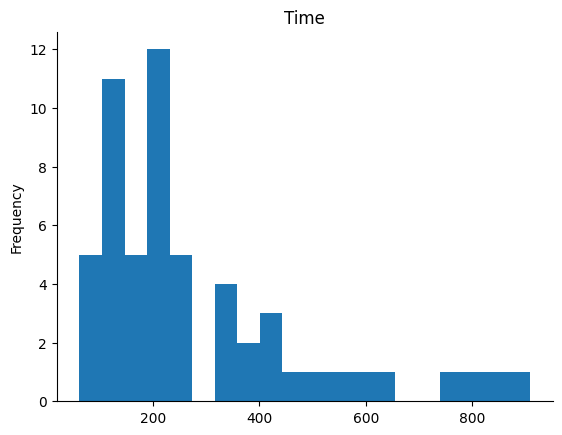

In [ ]:
# @title Time

from matplotlib import pyplot as plt
df_sewing['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

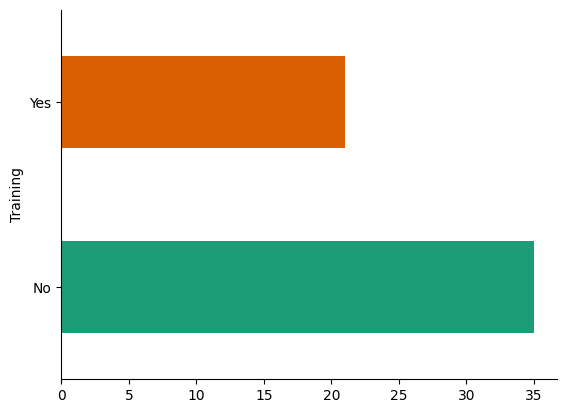

In [ ]:
# @title Training

from matplotlib import pyplot as plt
import seaborn as sns
df_sewing.groupby('Training').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_sewing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Time      56 non-null     int64 
 1   Training  56 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [ ]:
df_sewing.isna().sum()

,0
Time,0
Training,0


In [ ]:
df_sewing.duplicated().sum()

1

First check the variance of 2 groups here. So that we can know we should apply tests for unequal variance or equal variances. Before applying tests, check the assumptions of the tests.
1. Population is normally distributed( using qq plots or residual plots)
2. Every observation is independent and identically distributed.

ANOVA: Best for normally distributed data with equal variances across groups.

Welch's ANOVA: Best for normally distributed data with unequal variances across groups.

Kruskal-Wallis: Best for non-normal data or ordinal data, with no assumptions about the variance.

In [ ]:
variance_by_group = df_sewing.groupby('Training')['Time'].var()

print(variance_by_group)

Training
No     51730.692437
Yes     5835.900000
Name: Time, dtype: float64


In [ ]:
# df_analysis
df_analysis = df_sewing[df_sewing['Training']=='Yes'].describe()
df_analysis.columns = ['Yes']
df_analysis['No'] = df_sewing[df_sewing['Training']=='No'].describe()
df_analysis.to_csv('df_test.csv')

In [ ]:
print(df_analysis)

              Yes          No
count   21.000000   35.000000
mean   172.000000  345.314286
std     76.393063  227.443823
min     61.000000   96.000000
25%    113.000000  161.500000
50%    191.000000  246.000000
75%    213.000000  438.000000
max    351.000000  910.000000


Here unequal variance, so we cant use ANOVA test. However, we can just check how the results would be.

Check assumptions using qq plot and residual plot.

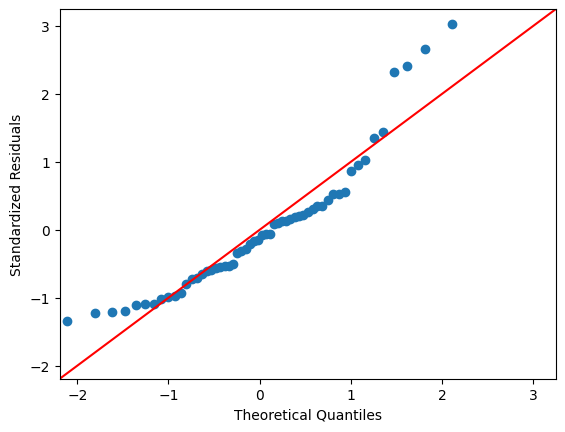

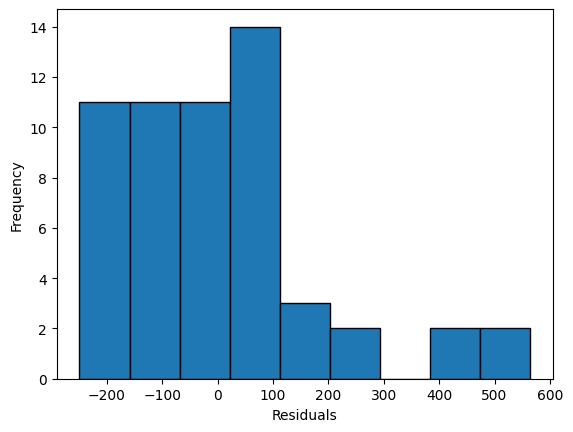

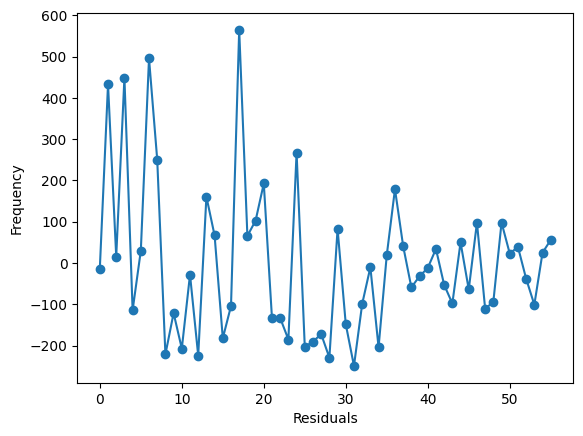

In [ ]:
# QQ-plot

# ANOVA model
res = stat()
res.anova_stat(df=df_sewing, res_var='Training', anova_model='Time ~ C(Training)')

# Residual Plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()
# histogram
plt.plot(res.anova_model_out.resid, '-o')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

From assumptions checking, data is not perfectly normal. So we cant try welch test.

In [ ]:
#perform Welch's ANOVA
pg.welch_anova(dv='Time', between='Training', data=df_sewing).T

,0
Source,Training
ddof1,1
ddof2,45.266971
F,17.106614
p-unc,0.000151
np2,0.173692


H0=No difference in time.
H1: There is difference or Training have a positive impact on the productivity of operators
Reject H0 if p value is less than .05. Here 0.000151 is less than .05, so reject H0. That is , yes there is a significant difference

In [ ]:
res = stat()
res.anova_stat(df=df_sewing, res_var='Training', anova_model='Time ~ C(Training)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Training),1.0,3.942467e+05,394246.671429,11.350905,0.001398
Residual,54.0,1.875562e+06,34732.621164,NaN,NaN


Lets try Kruskal Wallis for non normal and unequal variance

In [ ]:

# Perform Kruskal-Wallis test
kruskal_result = pg.kruskal(dv='Time', between='Training', data=df_sewing)

# Display the result
print(kruskal_result)

           Source  ddof1          H     p-unc
Kruskal  Training      1  10.124979  0.001463


so according to all the tests we can see that p values is less than 0.05. So, we can reject null hypothesis (H0) so yes 'Training has positive impact on productivity time'